#<font color='white'>Notebook for Alura's Data 4 Immersion </font>

####**<font color='red'>  The objective of this notebook is to create a model to predict real state purchasing prices in the city of São Paulo.** </font>

###**<font color='red'>  Introduction** </font>

<font color='white'>The city of São Paulo is the capital of the state of the same name and the headquarters of the São Paulo Metropolitan Region. The capital of São Paulo has 12 million inhabitants, making it the most populous city in Brazil. It is inserted in the Atlantic Forest biome, having a predominantly Humid Subtropical climate. The weather, however, can suffer abrupt variations during the day.

The city is considered a global city due to its economic dynamism and the services it offers, especially with regard to transportation and communication networks. São Paulo presents, however, many structural challenges characteristic of large metropolises. </font>

#### <font color='white'>  Geographic data of the city of São Paulo </font>

*   Total area: 1,521.110 km²
*   Total population: 12,325,232 (IBGE, 2020)
*   Demographic Density: 7,398.26 hab/km² (IBGE, 2010)
*   Climate: Humid Subtropical
*   Altitude: 760.2 meters
*   Time zone: GMT -3 hours (Brasília time)
*   HDI: 0.73
*   GDP: R$ 714,683,362,460 

*   GDP per capita: R$ 58,691.90
*   Foundation: January 25, 1554  

<figure>
<center>
<img src='https://s5.static.brasilescola.uol.com.br/be/2021/08/horizonte-sao-paulo.jpg' />
<figcaption>Aerial view of the city of São Paulo</figcaption></center>
</figure>







<font color='white'> Importing the libraries that will be used. </font> 

In [8]:
import pandas as pd
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


<font color='white'> Loading the database </font> 

In [9]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
data = pd.read_csv(url)
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Changing the columns names of the database from Portuguese to English

In [10]:
data.columns = ["Street", "Neighborhood", "City", "Size", "Bedrooms", "Bathrooms", "Vacancies", "Value"] 
data.head()

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Value
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Analysing the database, for this the ***info*** function was used to observe the type of data of each column.

###Initial data exploration 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Street        6574 non-null   object
 1   Neighborhood  9996 non-null   object
 2   City          10008 non-null  object
 3   Size          10008 non-null  int64 
 4   Bedrooms      10008 non-null  int64 
 5   Bathrooms     10008 non-null  int64 
 6   Vacancies     10008 non-null  int64 
 7   Value         10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Printing 10 random samples from the database

In [12]:
data.sample(10)

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Value
9718,"Rua Orlando Ferraiuolo, 428",Vila Brasilina,São Paulo,250,3,3,4,R$ 689.000
8508,Rua Professor Eduardo Monteiro,Jardim Leonor,São Paulo,640,4,6,4,R$ 4.390.000
3089,NaN,Jardim Miriam,São Paulo,400,5,5,4,R$ 1.950.000
5991,Rua Doutor Carneiro Maia,Vila Água Funda,São Paulo,138,2,2,2,R$ 850.000
3251,Rua Irlanda,Jardim Europa,São Paulo,482,4,5,5,R$ 9.050.000
1733,Rua Lourenço Castanho,Vila Nova Conceição,São Paulo,350,4,4,9,R$ 4.000.000
2044,Rua Maranduba,Aclimação,São Paulo,160,3,3,1,R$ 1.400.000
5011,NaN,Jardim Monte Kemel,São Paulo,189,4,5,3,R$ 799.000
5256,NaN,Jardim Taboão,São Paulo,83,3,3,2,R$ 550.000
9422,Rua Francisco Correia Dutra,Jardim Maria Luiza,São Paulo,220,3,1,3,R$ 900.000


Finding out how many properties there are in each neighborhood

In [13]:
data["Neighborhood"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Neighborhood, Length: 701, dtype: int64

Plot the top 20 neighborhoods on a bar graph

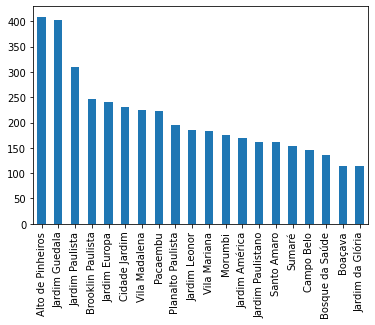

In [14]:
n_buildings = data["Neighborhood"].value_counts()
n_buildings.head(20).plot.bar()

Calculate the average dimensions for each of the neighborhoods. Abd show the 10 first oservations 

In [15]:
mean_size_district = data.groupby("Neighborhood")["Size"].mean().round(2)
mean_size_district.head(10) 

Neighborhood
Aclimação                   253.06
Alto da Boa Vista           418.88
Alto da Lapa                294.34
Alto da Mooca               270.05
Alto de Pinheiros           433.44
Aricanduva                  278.00
Balneário Mar Paulista      250.00
Barra Funda                 135.44
Barro Branco (Zona Norte)   489.00
Bela Aliança                345.48
Name: Size, dtype: float64

Find out which neighborhoods have no street names.

In [16]:
from numpy import NaN
no_street_district = data[data['Street'].isna()]
no_street_district.head()

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Value
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000


##Data handling - Working on the database

Print the first observation of the array ***Value*** and check how this data is structured.

In [17]:
data["Value"][0]

'R$ 7.000.000'

Apply python's split method to separate the string by the gaps between characters

In [18]:
data["Value"][0].split()

['R$', '7.000.000']

Check if all values are in the R$ "value" format or if there are other filling methods. For this purpose a sample of 10 random values will be taken

In [19]:
data.sample(10)

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Value
4885,NaN,Jardim América,São Paulo,420,3,4,6,R$ 8.900.000
7924,NaN,Vila Mazzei,São Paulo,73,2,3,1,R$ 400.000
1358,NaN,Vila Madalena,São Paulo,386,4,2,5,R$ 2.900.000
6900,Avenida Portugal,Brooklin Paulista,São Paulo,180,3,2,4,R$ 1.700.000
1224,Rua Ourânia,Vila Madalena,São Paulo,591,4,7,5,R$ 20.000\n /Mês
7185,"Rua Engenheiro Sá Rocha, 663",Vila Ida,São Paulo,456,4,4,4,R$ 4.500.000
2317,NaN,Penha de França,São Paulo,180,3,1,3,R$ 750.000
4194,"Rua Pianú, 345",Vila Ida,São Paulo,527,5,3,8,R$ 2.970.000
918,Rua Gonçalves Ferreira,Parque São Rafael,São Paulo,120,2,1,2,R$ 380.000
1935,NaN,Morumbi,São Paulo,805,4,7,14,R$ 12.000.000


From the sample, at index 664 we have a filling of the type  R$ 15.000\n/Mês

Now the **split** method will be applied to the entire "Value" column. To do this we convert the column to a string and apply the method. Then we'll put each of these values into a different column of a new dataframe

In [20]:
data["Value"].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


Now applying the *unique* method to the first column to check if what we have is just the R$ or if there are other values

In [21]:
data["Value"].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

It can be concluded that in column ***0***, of this dataframe. The values are only the R$ and there is no relevant values in this column

Check the number of unique values in column 1 

In [22]:
len(data["Value"].str.split(expand=True)[1].unique())

1038

Checking the single values of column 3 - the time reference, whether the value is daily, monthly, or yearly

In [23]:
data["Value"].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

It was found that the column shows several values, from daily to yearly. This indicates that we have sales and rental values in the same dateframe.

Now these values will be added to the original dataframe

In [24]:
data[["Currency", "Advertisement_Value", "Advertisement_Type",]] = data["Value"].str.split(expand=True)

In [25]:
data.head()

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Value,Currency,Advertisement_Value,Advertisement_Type
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


The Dataframe now has 3 new columns at the end

Select in the "Advertisement_Type" column the *null* values

In [26]:
data[data["Advertisement_Type"].isnull()]

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Value,Currency,Advertisement_Value,Advertisement_Type
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


Pass these values of the selection to a new column, this way just the the sales values are selected. Which are those in which the "Advertisement_Type" is null, so this are the ones that don't have the variables /month, /day, or /year. For this we create a new Dataframe ***data_sell***.

In [27]:
data_sell = data[data["Advertisement_Type"].isnull()]
data_sell

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Value,Currency,Advertisement_Value,Advertisement_Type
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


Using the ***info*** function to observe the data types in the Dataframe

In [28]:
data_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Street               6107 non-null   object
 1   Neighborhood         9146 non-null   object
 2   City                 9156 non-null   object
 3   Size                 9156 non-null   int64 
 4   Bedrooms             9156 non-null   int64 
 5   Bathrooms            9156 non-null   int64 
 6   Vacancies            9156 non-null   int64 
 7   Value                9156 non-null   object
 8   Currency             9156 non-null   object
 9   Advertisement_Value  9156 non-null   object
 10  Advertisement_Type   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


Now to perform mathematical operations on the *Advertisement_Type* column, the dot will be removed. Because Python runs in English, the . is the thousand separator and therefore cannot appear more than once. This prevents the conversion of these string values (str) to a numeric value, float for example. 

In [29]:
data_sell["Advertisement_Value"].str.replace(".","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000
1        3700000
2         380000
3         685000
4         540000
          ...   
10002    1500000
10003     665000
10004    2300000
10005    1050000
10007     270000
Name: Advertisement_Value, Length: 9156, dtype: object

Now convert the *Advertisement_Value* column to float type and substitute this value for it float type.

In [30]:
data_sell["Advertisement_Value"] = data_sell["Advertisement_Value"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
data_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Street               6107 non-null   object 
 1   Neighborhood         9146 non-null   object 
 2   City                 9156 non-null   object 
 3   Size                 9156 non-null   int64  
 4   Bedrooms             9156 non-null   int64  
 5   Bathrooms            9156 non-null   int64  
 6   Vacancies            9156 non-null   int64  
 7   Value                9156 non-null   object 
 8   Currency             9156 non-null   object 
 9   Advertisement_Value  9156 non-null   float64
 10  Advertisement_Type   0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


Now the Advertisement_Value column is of type float64, which allows mathematical operations to be performed on it.

The columns ***Currency***, *Value* and ***Advertisement_Type***  can be removed from the dataframe.

In [32]:
data_sell.drop(columns=['Currency', "Value", "Advertisement_Type"], inplace=True)
data_sell.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00


This values will be plotted as a Histogram

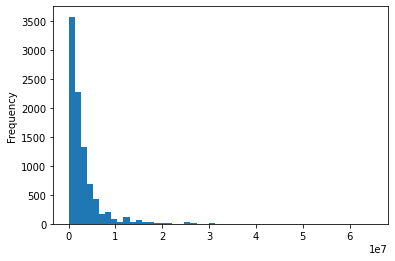

In [33]:
data_sell["Advertisement_Value"].plot.hist(bins=50)

Set the decimal precision digits to two digits and removes the cientific notation on the column *Advertisement_Value*


In [34]:
data_sell.describe(include = "all") 

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,3500000.00


Applying the describe function only on non-numerical variables 

In [35]:
data_sell[["Street","Neighborhood",	"City"]].describe()  

,Street,Neighborhood,City
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


Importing the Seaborn and the Matplotlib library for data plotting

In [36]:
import numpy as np
import seaborn as sns 
sns.set() 
import matplotlib.pyplot as plt 

Plotting a histogram with the property value

<function matplotlib.pyplot.show>

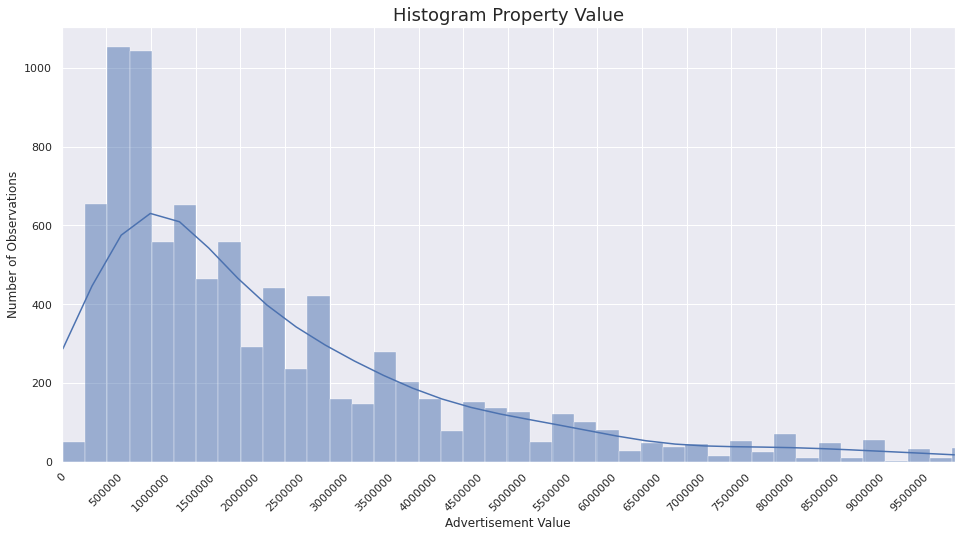

In [37]:
plt.figure(figsize = (16,8))
ax = sns.histplot(data=data_sell, x='Advertisement_Value', kde=True)
ax.set_title("Histogram Property Value", fontsize=18)
ax.set(xlabel ="Advertisement Value", ylabel = "Number of Observations")
plt.xlim((-50,10000000))
x_ticks = np.arange(0, 10000000.0, 500000)
plt.xticks(x_ticks, rotation=45)
plt.ticklabel_format(style='plain', axis='x') 
ax = ax
plt.show 

#Análise sobre o GRAFICOOOOOO

<font color='White'>**Desafios desta aula** 

  1 -  Criar uma escala de valores em milhões. </br>
  2 -  Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala). </br>
  3 -  Preço do metro quadrado por bairro e plotar em um gráfico ideal. (FAZER) </br>
  4 -  Explorar as bibliotecas de visualizações e colocar as suas conclusão. </br>
  5 -  Pesquisar um visualização para analisar os quartis, mediana e outliers
  </font>

 Square meter price by neighborhood and plot it on an ideal graph.

In [38]:
 data_sell.head(3)

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00


In [39]:
data_sell["Square_Meter_Value"] = data_sell["Advertisement_Value"] / data_sell["Size"]
data_sell.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value,Square_Meter_Value
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00


There are some problems with calculating the average so directly, as this method is very sensitive to discrepancies in the dataset, so we will try another method to try to create a weighted average

In [40]:
data_district = data_sell.groupby("Neighborhood").sum()

In [41]:
data_district["Square_Meter_Value"] = data_district["Advertisement_Value"] / data_district["Size"]
data_district.head()

,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value,Square_Meter_Value
Neighborhood,,,,,,
Aclimação,19447,258,240,230,139292801.00,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,11126.34


Comparing the two calculation models for the average *Square_Meter_Value* one can notice a difference

In [42]:
data_sell.groupby("Neighborhood").mean().loc["Vila Mariana"]

Size                      231.24
Bedrooms                    3.39
Bathrooms                   3.24
Vacancies                   2.95
Advertisement_Value   1771159.76
Square_Meter_Value       7913.15
Name: Vila Mariana, dtype: float64

In [43]:
data_district.loc["Vila Mariana"]

Size                      39079.00
Bedrooms                    573.00
Bathrooms                   547.00
Vacancies                   499.00
Advertisement_Value   299326000.00
Square_Meter_Value         7659.51
Name: Vila Mariana, dtype: float64

The weighted average will be substitued in the original dataframe **data_sell**

After using the groupby function the grouping parameter becomes the index of the new dataframe. The index should not be used as one of the axes, because it causes problems, when atributing values from this dataframe to other or whenplotting the data. The reason is that the index is used as a connection between two dataframes, as an adress to apply some functions.  To solve this we will reset the index.

In [44]:
data_district.reset_index(inplace=True) 
data_district.head()

,Neighborhood,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value,Square_Meter_Value
0,Aclimação,19447,258,240,230,139292801.00,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,11126.34


Observing if the index was reseted

In [45]:
data_district.head(2)

,Neighborhood,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value,Square_Meter_Value
0,Aclimação,19447,258,240,230,139292801.00,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,5708.74


Now, the weighted average from the *data_sell* will be substitued by Square meter avarage from dataframe ***data_district***

In [46]:
data_sell["Square_Meter_Value"] = data_district["Square_Meter_Value"] 
data_sell.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value,Square_Meter_Value
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7162.69
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,5708.74
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,6961.30
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,4385.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,11126.34


The data will be plotted as a boxplot to evaluate the behavior and observe if there are some outliers

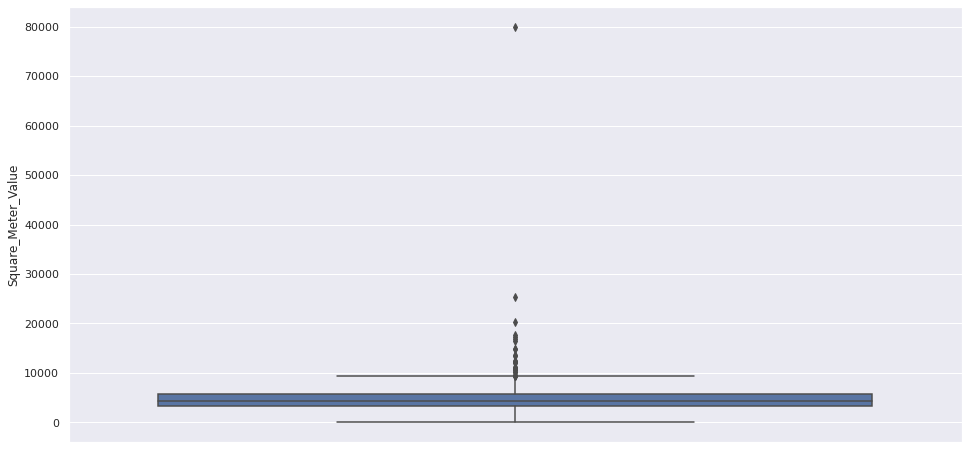

In [47]:
plt.figure(figsize = (16,8))
ax = sns.boxplot(data=data_sell, y="Square_Meter_Value")

Observing the boxplot, the values higher than 30000 m² are probably outliers. The same graph will be plotted limiting the values in the y axis to maximum of 30000 m² 

(0.0, 30000.0)

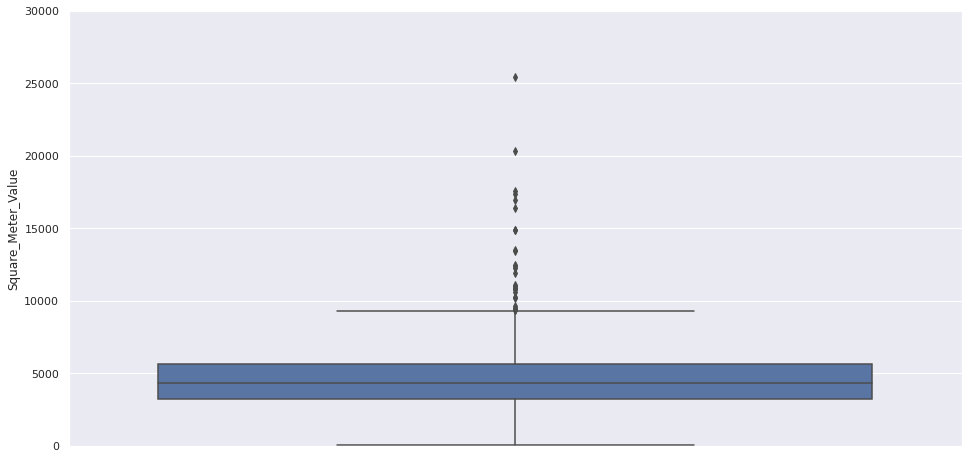

In [48]:
plt.figure(figsize = (16,8))
ax = sns.boxplot(data=data_sell, y="Square_Meter_Value")
plt.ylim((0,30000))

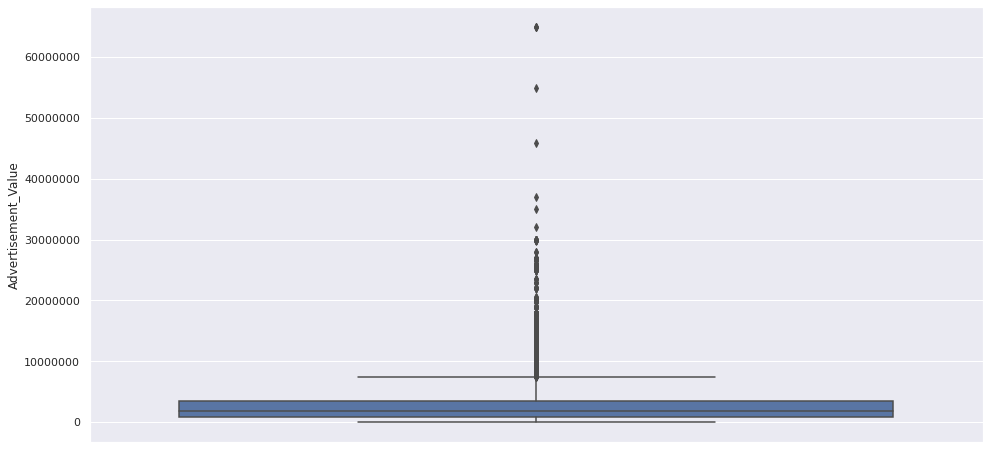

In [49]:
plt.figure(figsize = (16,8))
ax = sns.boxplot(data=data_sell, y="Advertisement_Value")
plt.ticklabel_format(style='plain', axis='y')

Values higher than 30 miliions wil be treated as outliers and the same graph will be plotted with a limitation in the y axis of 30 millions.

(0.0, 30000000.0)

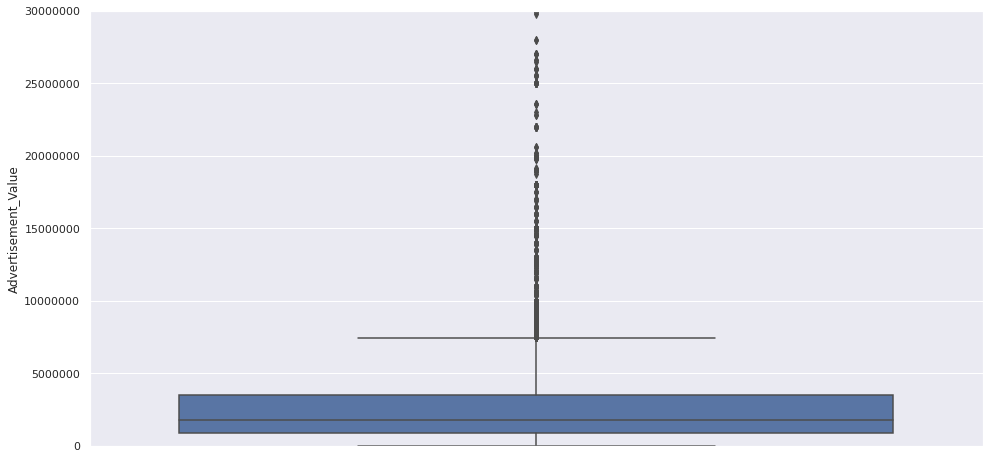

In [50]:
plt.figure(figsize = (16,8))
ax = sns.boxplot(data=data_sell, y="Advertisement_Value")
plt.ticklabel_format(style='plain', axis='y')
plt.ylim((0,30000000))

Using the ***slice***, to select the top 10 neighborhoods with more properties to sell

In [51]:
top_district = data_sell["Neighborhood"].value_counts()[:10].index
data_district.query("Neighborhood in @top_district")

,Neighborhood,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value,Square_Meter_Value
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,8803.82


Plottig this data in a bar chart

<function matplotlib.pyplot.show>

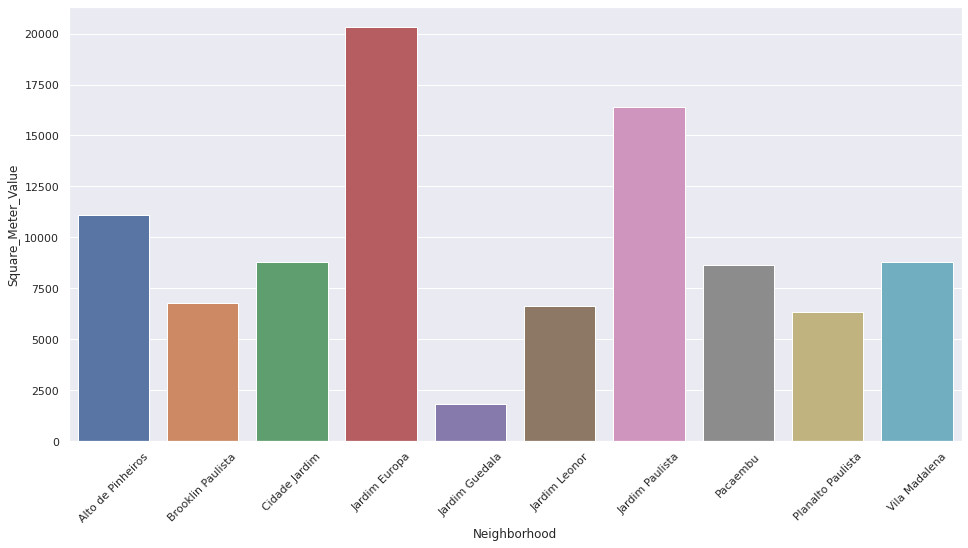

In [52]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x="Neighborhood", y="Square_Meter_Value", data = data_district.query("Neighborhood in @top_district"))
ax.tick_params(axis="x", rotation=45)
plt.show

<function matplotlib.pyplot.show>

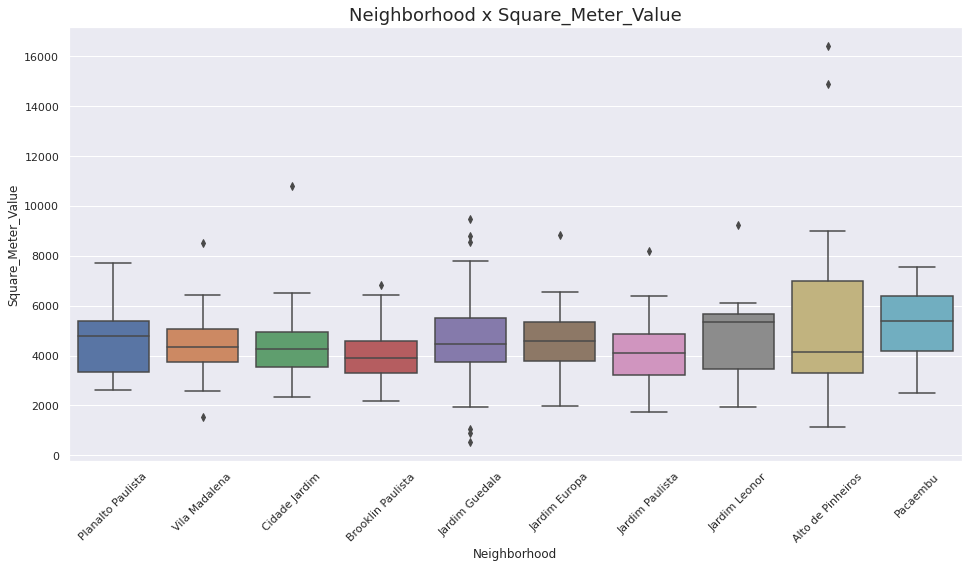

In [53]:
plt.figure(figsize = (16,8))
ax = sns.boxplot(data = data_sell.query("Neighborhood in @top_district"), x="Neighborhood", y="Square_Meter_Value")
ax.set_title("Neighborhood x Square_Meter_Value",fontsize=18)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show

#Importing the IBGE data to the dataframe
IBGE - Intituto Brsileiro de Geografia e Estatística - Brazilian Institute of Geography and Statistics.

Importing the IBGE data and correcting the database

The objective is to take part of this dataset and correlate it with the ***data_sell*** database. For this reason the dataset will be left with it's original name and when it is correlated with the other dataset, the columns name will be changed to english.


In [54]:
url_ibge = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'
ibge_sp = pd.read_csv(url_ibge, encoding="ISO-8859-1", sep=";", thousands=".", decimal=",")
ibge_sp.dropna(how="all", axis=1, inplace=True)
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


Using the info command to get more information about this new database

In [55]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

A third address database, with latitude and longitude will be loaded, to correlate the other two databases, ***data_sell*** with the ***IBGE census data*** (ibge_sp)

In [56]:
address = pd.read_csv("/content/drive/MyDrive/data/Imersao_dados_4/enderecos.csv")
address.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


This address database has values outside SP to speed up future searches we will filter the data only for SP

In [57]:
address_sp = address.query("sigla_uf == 'SP' ")
address_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35


The dataframe ***address_sp*** will have the columns name changed to english

In [58]:
address_sp.columns = ["type_logr", "logr_name", "logr_compl",  "number", "neighborhood", "name_locality" , "acronym_uf",  "zip_code", "latitude","longitude"] 
address_sp.head()

,type_logr,logr_name,logr_compl,number,neighborhood,name_locality,acronym_uf,zip_code,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35


It is not possible to work with the complete street address column (logr_compl) because it has some problems like: Rua João Antônio Vasconcelos - até 627/628. This will generate future problems, the solution is to work with the street type and street name, respectively "logr_type" and "logr_name". To do that let's create a new variable in this dataframe, called "street" that combines these two variables 

In [59]:
address_sp["street"] = address_sp["type_logr"] + " " + address_sp["logr_name"] 
address_sp["street"] = address_sp["street"].str.lower().str.strip() 
address_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,type_logr,logr_name,logr_compl,number,neighborhood,name_locality,acronym_uf,zip_code,latitude,longitude,street
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


Something similar for the sales data (data_sell) will be done, but for this dataframe it has the house number next to the street address. Then the street number will be removed, this way just the street names will be left

In [60]:
data_sell["Street"].str.extract(r'(^[\w ]+)')[:10]

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


In [61]:
data_sell["just_street"] = data_sell["Street"].str.extract(r'(^[\w ]+)')
data_sell["just_street"] = data_sell["just_street"].str.lower().str.strip()
data_sell.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value,Square_Meter_Value,just_street
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7162.69,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,5708.74,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,6961.30,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,4385.00,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,11126.34,rua tobias barreto


Now we will link the two databases, the sales database (***data_sell***) with the address database (***enderecos_sp***), from the latter we will get only the ZIP code, Latitude and Longitude columns. For this the pandas "merge" function will be used and we will create a new database called *data_geo *

In [62]:
data_geo = pd.merge(left = data_sell, right = address_sp[["street","zip_code","latitude","longitude"]], how= "left", left_on="just_street", right_on="street")
data_geo

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value,Square_Meter_Value,just_street,street,zip_code,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7162.69,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
1,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7162.69,avenida itacira,avenida itacira,4061000.00,-23.62,-46.65
2,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7162.69,avenida itacira,avenida itacira,4061001.00,-23.62,-46.65
3,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7162.69,avenida itacira,avenida itacira,4061002.00,-23.62,-46.65
4,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7162.69,avenida itacira,avenida itacira,4061003.00,-23.62,-46.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90275,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.00,NaN,rua guararema,rua guararema,6786410.00,-23.63,-46.81
90276,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.00,NaN,rua guararema,rua guararema,12060100.00,-23.02,-45.56
90277,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.00,NaN,rua guararema,rua guararema,6922800.00,-23.63,-46.81
90278,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,NaN,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63


Observing the Dataframe it was noticed that several lines were created with very similar information, it can be due to having the same street name, but with different latitudes and longitudes for exemple. So it is duplicating several lines, this way, these duplicates need to be removed. So  onlya a single row for each data will be kept in the sales table (***data_sell***)

In [63]:
data_geo = pd.merge(left = data_sell, right = address_sp[["street","zip_code","latitude","longitude"]], how= "left", left_on="just_street", right_on="street").drop_duplicates(subset=data_sell.columns).query("zip_code > 0") 
data_geo

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value,Square_Meter_Value,just_street,street,zip_code,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7162.69,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,5708.74,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,6961.30,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,4385.00,NaN,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,11126.34,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,NaN,avenida odila,avenida odila,4058020.00,-23.61,-46.65
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,NaN,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.00,NaN,rua guararema,rua guararema,13030640.00,-22.92,-47.08
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,NaN,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63


It was noticed that the number of records has been drastically reduced, the dataframe with duplicates had 90280 rows and the current "clean" one has only 8520 rows

In [64]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

Analyzing the IBGE database one notices that there is no information about latitude and longitude, there are only sector code values (***Cod_setor***)

For this a new python library is need to work with geolocalized data. This way, the latitude and longitude of the table will be used to link with geolocation files (shapefile polygons) of census areas in SP. 

In [65]:
from shapely.geometry import Point

This library is for working with surfaces, this function Point creates a geolocalized point, i.e. with the latitude and longitude entered. In the same library a polygon can be imported.
The contains method, which tells if a certain point is contained within this surface. The idea is to use this method on the ***Cod_setor*** data from the IBGE database, creating a polygon and then use the function Point on the latitude and longitude data from the sales database (***data_sell***) creating points with the properties location and finally use the contain function to determine if these points are in which census region of SP. 


 **The next step is to load the geolocalized data from IBGE with data in shapefile format and etc.**.</br>
 For this we need the geopandas library, but it doesn't come by default in Google Colab, so let's install it. 

In [66]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.3 MB/s 
     |████████████████████████████████| 6.3 MB 28.6 MB/s 
     |████████████████████████████████| 16.7 MB 131 kB/s 


Now let's import this library

In [67]:
import geopandas as gpd
setor_censo = gpd.read_file("/content/drive/MyDrive/data/Imersao_dados_4/sp_setores_censitarios/35SEE250GC_SIR.shp")
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


The first step is to perform a filter on this database, so only the results from the city of SP is kept.

In [68]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"] 

Using this *Point* and *Contains* method we can link these two databases (*data_geo and sector_censo_sp*) using the latitude and longitude as a link. For this we compare the data of latitude and longitude data in the data_geo with the same data setor_censo_sp and filter with the *contains* method, if the latitude and latitude in the data_geo is contained in the setor_censo_sp the data in the row is copied and this processes is repeted in the subsequential line.  

In [69]:
#data_geo["Point"] = ""  
#for i in data_geo.index:
#    data_geo["Point"][i] = Point(data_geo["longitude"][i], data_geo["latitude"][i]) 
#data_geo["setor_censo"] = data_geo["Point"].map(  
#   lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), "CD_GEOCODI"].values 
#).str[0]
#data_geo.head()

In [70]:
#data_geo.to_csv('/content/drive/MyDrive/data/Imersao_dados_4/data_geo.csv', index = False)

In [71]:
data_geo = pd.read_csv("/content/drive/MyDrive/data/Imersao_dados_4/data_geo.csv")
data_geo.head()

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value,Square_Meter_Value,just_street,street,zip_code,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7162.69,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,5708.74,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,6961.30,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,4385.00,NaN,NaN,18125000.00,-23.53,-47.26,POINT (-47.2550228 -23.5310431),NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,11126.34,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29,POINT (-47.2944609 -22.6989009),NaN


Now the data from the census will be merged with the data from the IBGE.

In [72]:
data_sell_censo = pd.merge(left=data_geo[data_geo["setor_censo"].notnull()], right = ibge_sp, how = "left", left_on="setor_censo", right_on="Cod_setor")
data_sell_censo.head()

,Street,Neighborhood,City,Size,Bedrooms,Bathrooms,Vacancies,Advertisement_Value,Square_Meter_Value,just_street,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,5708.74,rua aurelia perez alvarez,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
1,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,6961.30,rua alba valdez,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
2,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1726.62,rua graham bell,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
3,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,850000.00,3600.00,rua francisco paulo,...,2.95,2.18,1580.84,4440789.58,1897.01,4730743.23,1284.45,2578384.56,1743.39,2699812.75
4,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,450000.00,5675.14,rua guilherme valente,...,3.23,2.13,1613.93,33332390.49,1721.15,35369361.97,880.61,12700171.03,1333.63,18640212.36


Observing the data contained in this new dataframe

In [73]:
data_sell_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 0 to 3896
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Street                 3897 non-null   object 
 1   Neighborhood           3892 non-null   object 
 2   City                   3897 non-null   object 
 3   Size                   3897 non-null   int64  
 4   Bedrooms               3897 non-null   int64  
 5   Bathrooms              3897 non-null   int64  
 6   Vacancies              3897 non-null   int64  
 7   Advertisement_Value    3897 non-null   float64
 8   Square_Meter_Value     335 non-null    float64
 9   just_street            3897 non-null   object 
 10  street                 3897 non-null   object 
 11  zip_code               3897 non-null   float64
 12  latitude               3897 non-null   float64
 13  longitude              3897 non-null   float64
 14  Point                  3897 non-null   object 
 15  seto

A scatter plot will be lotted, using the values from column V005 - that in census asks about the average household income.

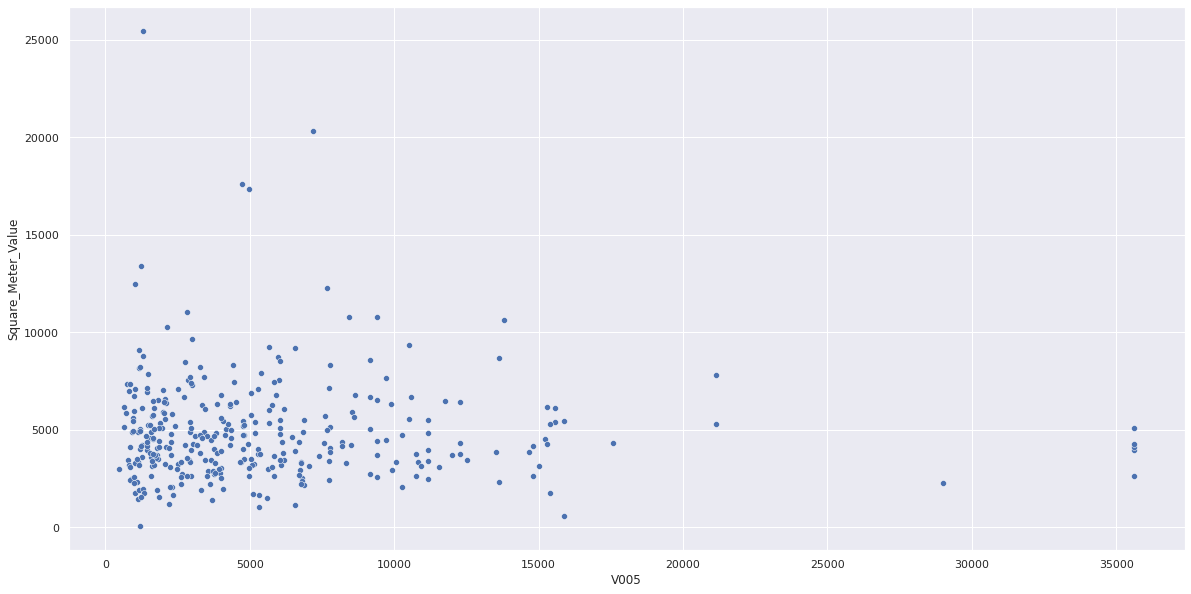

In [74]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=data_sell_censo, x="V005", y="Square_Meter_Value")
plt.ticklabel_format(style='plain', axis='y')

# <font color='white' size =5> Machine Learning </font> 

There are some values in the dataframe that are not relevant in the analysis, these values will be removed. In the next cell, just the values that will be kept, are show in the list.

In [75]:
data_sell_censo = data_sell_censo[['Street', 'Neighborhood', 'City', 'Size', 'latitude', 'longitude', 'setor_censo', "Cod_setor", "Advertisement_Value", 
                                   "Square_Meter_Value", 'latitude', 'longitude','V001','V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012'
                                   ]].dropna()

In [76]:
data_sell_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 334
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Street               335 non-null    object 
 1   Neighborhood         335 non-null    object 
 2   City                 335 non-null    object 
 3   Size                 335 non-null    int64  
 4   latitude             335 non-null    float64
 5   longitude            335 non-null    float64
 6   setor_censo          335 non-null    float64
 7   Cod_setor            335 non-null    float64
 8   Advertisement_Value  335 non-null    float64
 9   Square_Meter_Value   335 non-null    float64
 10  latitude             335 non-null    float64
 11  longitude            335 non-null    float64
 12  V001                 335 non-null    float64
 13  V002                 335 non-null    float64
 14  V003                 335 non-null    float64
 15  V004                 335 non-null    flo

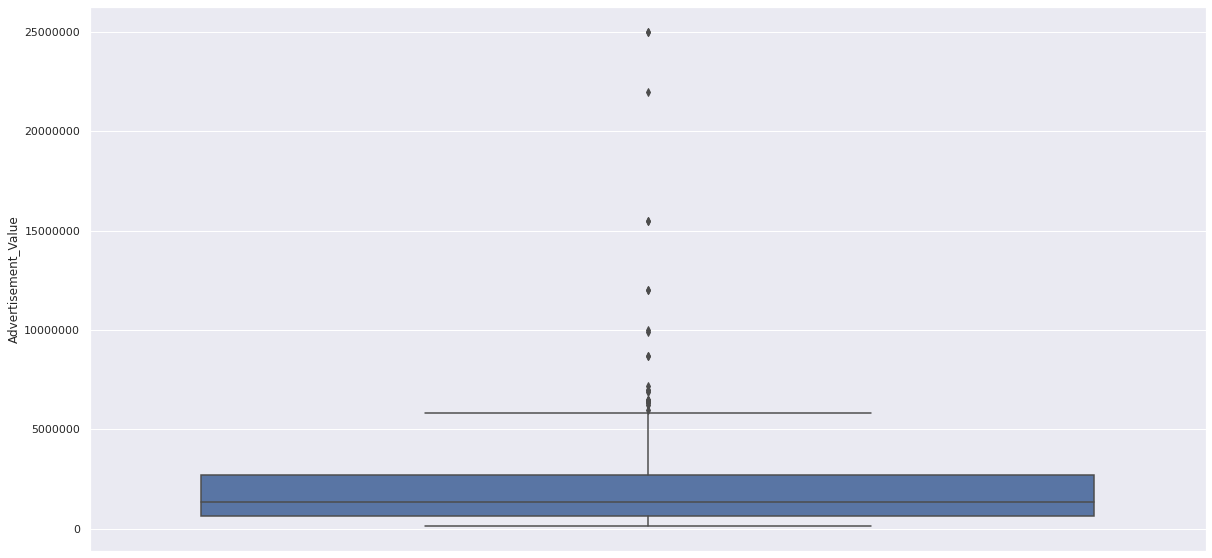

In [77]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=data_sell_censo, y="Advertisement_Value")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The values less than 100.000 and higher than 30.000.000 are candidates to outliers

In [78]:
data_sell_censo.query("Advertisement_Value >30000000 | Advertisement_Value < 100000")

,Street,Neighborhood,City,Size,latitude,longitude,setor_censo,Cod_setor,Advertisement_Value,Square_Meter_Value,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012


We have only 1 value that correspond to this range, with values above 30M and below 100K

The goal now is to remake the boxplot without these values, for this end this value will be removed these values from the database.


In [79]:
data_sell_censo.drop(data_sell_censo.query("Advertisement_Value >30000000 | Advertisement_Value < 100000").index, inplace=True)

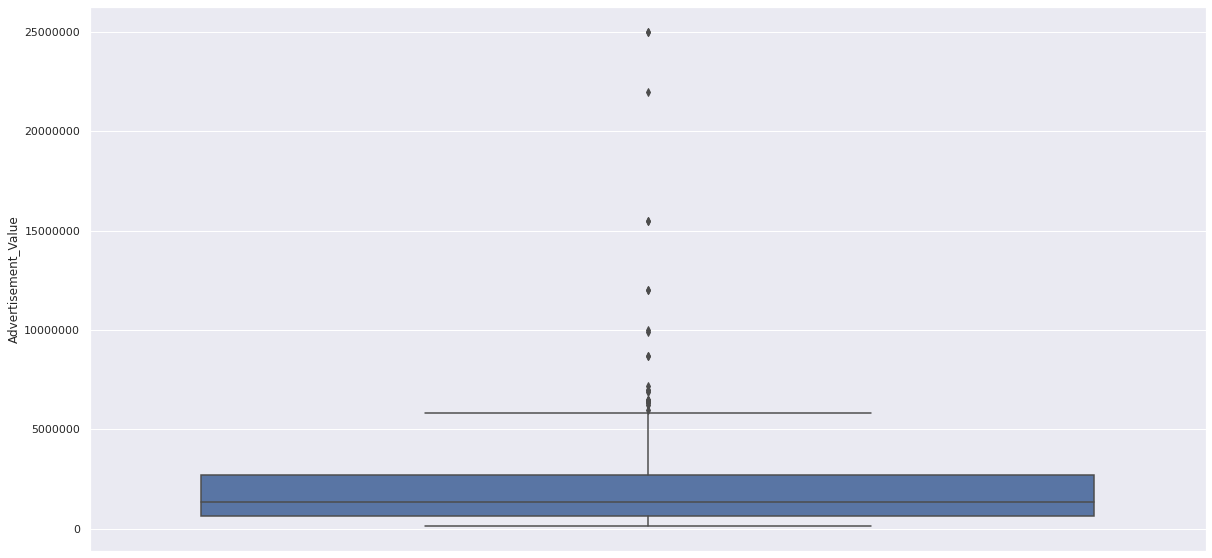

In [80]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=data_sell_censo, y="Advertisement_Value")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The next step is to analyze the distribution of these values with a scatter plot, with the advertisement values by square meter value

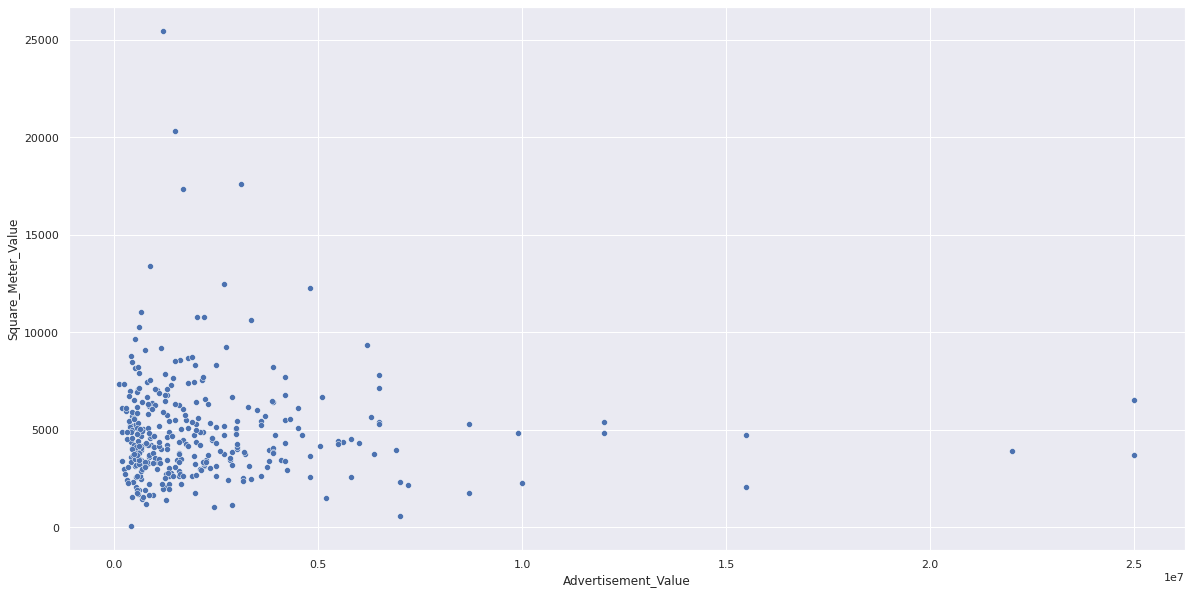

In [81]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=data_sell_censo, x="Advertisement_Value", y="Square_Meter_Value")

Observing the graph one can notice a V-shaped opening starting at point 0 on the x-axis


To better understand the correlation between these data, a heat map-type correlation plot will be plotted


Text(0.5, 1.0, 'Correlation')

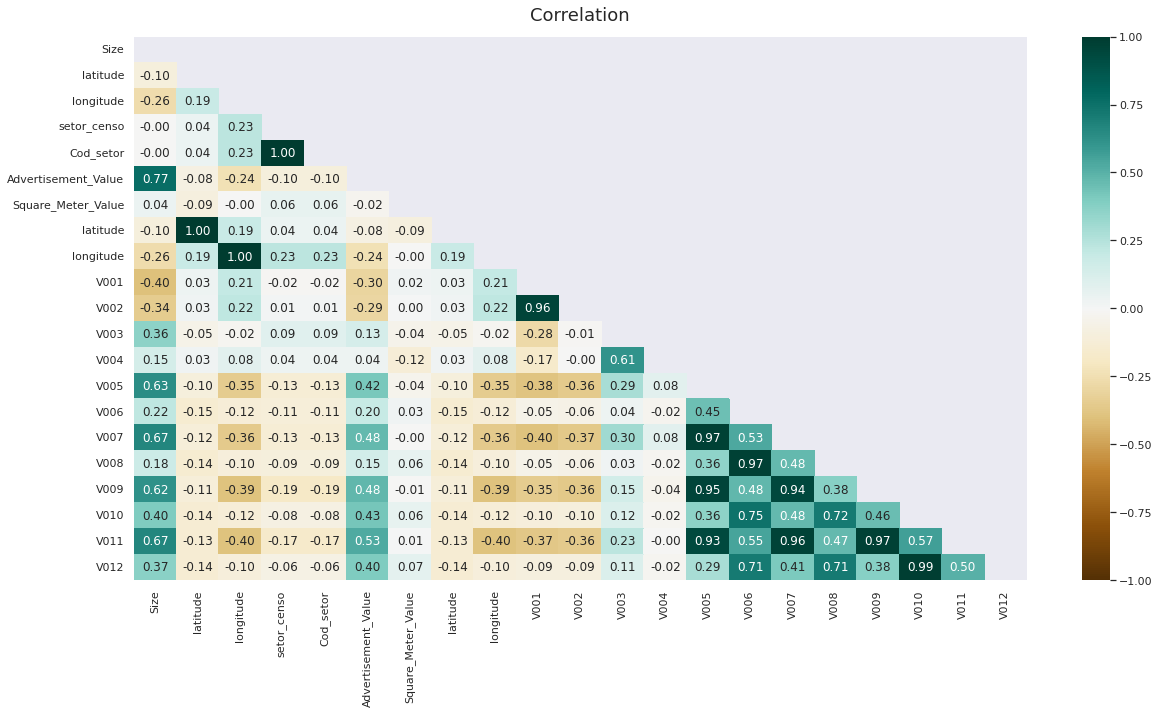

In [82]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(data_sell_censo.corr(), dtype=bool)) 
heatmap = sns.heatmap(data_sell_censo.corr(),mask=mask, vmin=-1, vmax=1, annot=True, cmap="BrBG", fmt='.2f')
heatmap.set_title("Correlation", fontdict={"fontsize":18}, pad=16)

Now begins the model training step. A ***linear regression model*** will be used in the analysis. The first step is  to import the linear regression model from the ***Scikit Learn*** library. </br>
Then the dataset will be sliced in data for training and for validation.

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

X = data_sell_censo[["Size"]] 
Y = data_sell_censo["Advertisement_Value"] 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state= 54)
lr = LinearRegression() 

Training the model

In [84]:
lr.fit(X_train, Y_train) 
print("Model Trained")

Model Trained


Some metrics that aim to summarize how the model performs will be calculated, these are the R² and the mean absolute error.

In [85]:
from sklearn.metrics import mean_absolute_error, r2_score

In [86]:
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test) 
r2_test = r2_score(Y_test, Y_predict_test) 
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

The variables trained

In [87]:
r2_train.round(2)

0.58

In [88]:
mae_train.round(2)

1051262.77

The variables used for train - so the real values

In [89]:
mae_test.round(2)

758829.06

In [90]:
r2_test.round(2)

0.65

Evaluating the results, was concluded that the R² value and the MAE (Mean Absolute error) for  the trained model performed a little worse than the values used in the test. In short, the model performed worse.

A scatter plot was plotted to evaluate the behavior of these variables

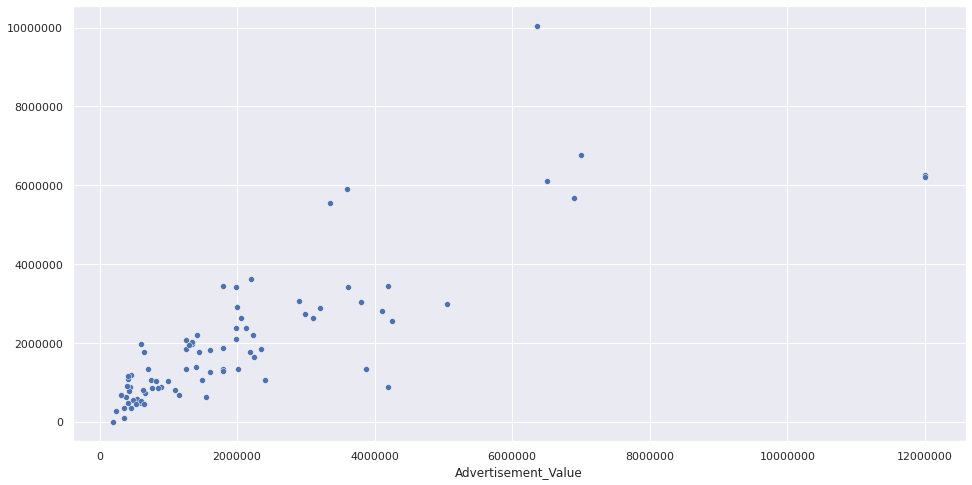

In [91]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(x= Y_test, y= Y_predict_test)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

Observing this graph, the actual values are on the X axis and the predicted values are on the Y axis. Observing the graph, probably for very high values the model does not perform very well, for this by observing the values in X smaller than 600000 it predicts more accurately. For values higher the observations have a larger opening angle, which indicates that the model may be predicting values with very high errors.


Observing the graph it can be concluded that more observations are needed for a more acurate.  

Calculating the residue for the predicted data

In [92]:
residue = Y_train - Y_predict_train
residue

46     -182681.19
100    -753823.04
252    -114545.09
322     156164.17
103    -126672.88
          ...    
225     391895.81
23     -599535.50
271   -1638136.16
325    1210438.92
111    -299535.50
Name: Advertisement_Value, Length: 251, dtype: float64

Plotting the residue x predicted value

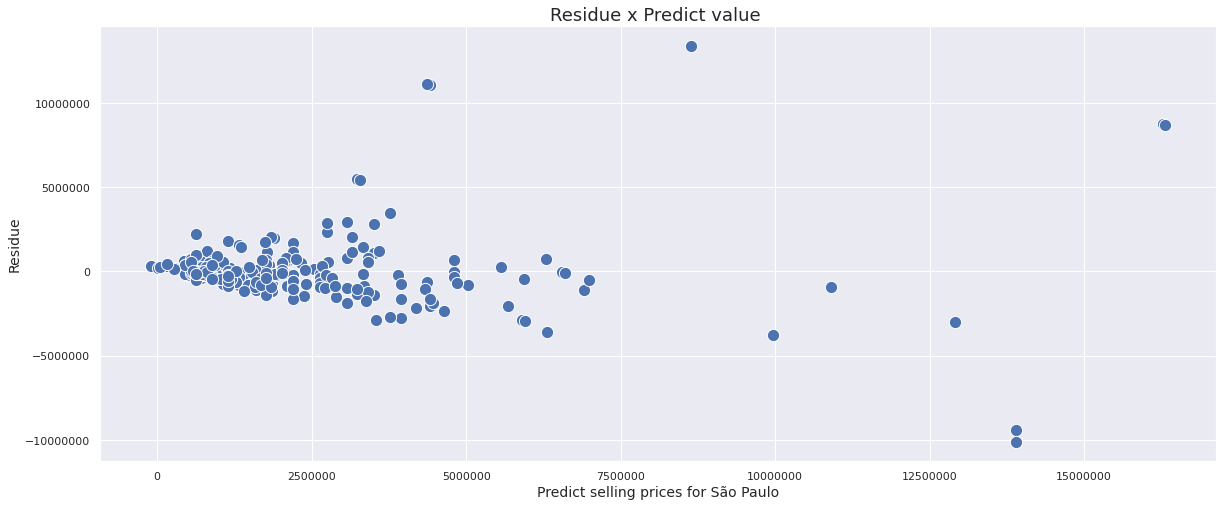

In [94]:
ax = sns.scatterplot(x=Y_predict_train, y=residue, s= 150) 
ax.figure.set_size_inches(20,8)
ax.set_title("Residue x Predict value ", fontsize=18)
ax.set_xlabel("Predict selling prices for São Paulo", fontsize=14)
ax.set_ylabel("Residue", fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
ax

Replotting the data but with the residue squared

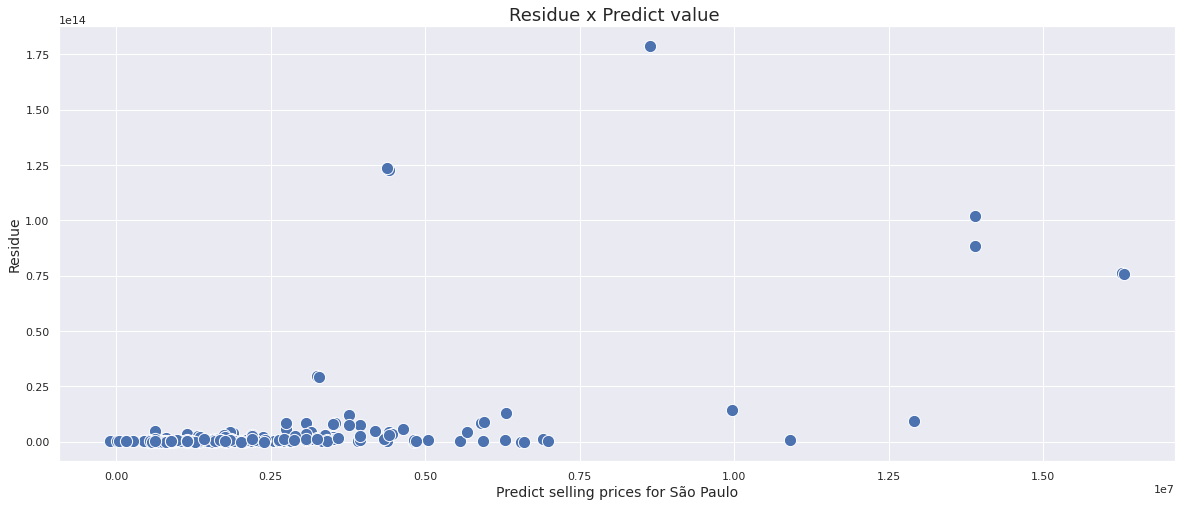

In [97]:
ax = sns.scatterplot(x=Y_predict_train, y=residue**2, s= 150) 
ax.figure.set_size_inches(20,8)
ax.set_title("Residue x Predict value ", fontsize=18)
ax.set_xlabel("Predict selling prices for São Paulo", fontsize=14)
ax.set_ylabel("Residue", fontsize=14)
ax

Observing the graph can be observed that the majority of the values were close to 0.25 and 0.5 with some values being higher than 0.75. It can be concluded that the model performs better at low values and loses accuracy when the values are higher than 0.5. </br>
This behavior indicates that there is Heteroscedasticity in the data, which implies that the variance of the errors is not constant. It is very important for a linear regression model that the errors vary constantly, this is called homoscedasticity.
The problem related above usually happens when the amount of observations are small, this indicates that it is need more observations to build a more acurate regression model. 

Plotting the frequency distribution for the residues

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


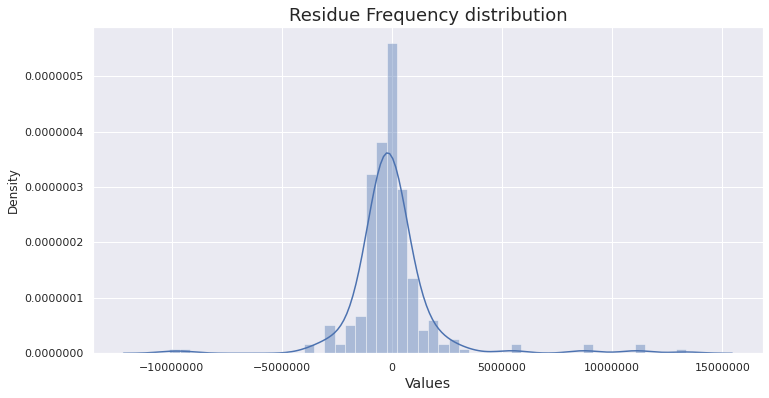

In [103]:
ax = sns.distplot(residue, bins=50) 
ax.figure.set_size_inches(12,6)
ax.set_title("Residue Frequency distribution", fontsize=18)
ax.set_xlabel("Values", fontsize=14)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
ax

This graph if excluded the outliers, the values higher and lower than 5000000, has a form of a bell that resemble the normal distribution graph. For values lower than 